In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv', nrows = 28000)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,34804,0.905340,-0.444087,-0.335214,1.097341,0.347810,0.956708,0.104177,0.214844,0.210624,-0.008459,-0.169429,0.408175,-0.642822,0.355605,-0.599442,-0.076929,-0.436540,0.078200,0.387181,0.148326,-0.049647,-0.335160,-0.376953,-1.344595,0.731523,-0.260203,-0.000636,0.018537,169.67,0
27996,34804,-0.272894,1.182035,-0.378801,0.949242,-0.020458,-0.845142,0.955518,0.148454,-0.719269,-0.096899,-0.986557,0.033860,0.209815,0.777940,0.647897,-0.316771,-0.120989,0.055921,0.491190,0.143489,0.204533,0.534778,0.226534,0.032599,-0.600684,-0.393867,0.284535,0.171296,89.99,0
27997,34804,1.204991,0.253059,0.251176,1.076599,-0.170065,-0.522115,0.070319,-0.037871,0.129104,0.001074,-0.340585,-0.253033,-1.013088,0.614098,1.279834,-0.197609,-0.090971,-0.479898,-0.721821,-0.243999,0.042323,0.161314,-0.055432,0.059273,0.582111,-0.295154,0.024198,0.014418,2.00,0
27998,34805,-0.667309,0.521356,0.965784,-0.714486,0.967801,-0.779216,0.869049,-0.166149,-0.725733,-0.645380,-1.155009,-0.183882,0.523435,0.215818,0.700234,0.254865,-0.545235,-0.522182,0.872223,0.217816,-0.378990,-1.322014,-0.001380,-0.598644,-0.114377,0.660993,-0.043222,0.086252,30.99,0


In [ ]:
test_dataset = df.sample(frac = 0.1, random_state = 42)
df = df.drop(test_dataset.index)

df.reset_index(drop = True, inplace = True)
test_dataset.reset_index(drop = True, inplace = True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(test_dataset.shape))

Data for Model Training & Validation: (25200, 31)
Unseen Data For Predictions: (2800, 31)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
!pip install pycaret

In [ ]:

from pycaret.classification import *

In [ ]:
expt_basic = setup(
    data = df, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    numeric_imputation="median",        # "mean" by default
    categorical_imputation="mode",      # "constant" (not_available) by default
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(25200, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_models = compare_models(sort = "F1", n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9994,0.9852,0.8548,0.9732,0.9071,0.9068,0.9103,0.855
lightgbm,Light Gradient Boosting Machine,0.9994,0.9553,0.8690,0.9565,0.9059,0.9056,0.9090,0.586
rf,Random Forest Classifier,0.9994,0.9781,0.8667,0.9565,0.9052,0.9049,0.9081,3.536
ada,Ada Boost Classifier,0.9993,0.9944,0.8548,0.9298,0.8872,0.8868,0.8894,2.898
gbc,Gradient Boosting Classifier,0.9987,0.9635,0.8095,0.8388,0.8128,0.8122,0.8178,14.114
dt,Decision Tree Classifier,0.9987,0.9210,0.8429,0.7909,0.8118,0.8112,0.8137,0.393
lda,Linear Discriminant Analysis,0.9979,0.9552,0.7476,0.6756,0.7030,0.7020,0.7063,0.106
lr,Logistic Regression,0.9979,0.9494,0.6357,0.7314,0.6706,0.6696,0.6760,2.224
ridge,Ridge Classifier,0.9974,0.0000,0.4762,0.6606,0.5439,0.5426,0.5546,0.025
qda,Quadratic Discriminant Analysis,0.9952,0.9088,0.7667,0.4107,0.5291,0.5270,0.5559,0.049


In [ ]:
for model in best_models:
    print(model)
    print()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

RandomForestC

In [ ]:
etc = create_model("et", fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,1.0000,0.8333,1.0000,0.9091,0.9088,0.9126
1,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
2,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
3,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
4,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
5,0.9995,0.9997,1.0000,0.8750,0.9333,0.9331,0.9352
6,0.9990,0.9997,0.8571,0.8571,0.8571,0.8566,0.8566
7,0.9990,0.8527,0.7143,1.0000,0.8333,0.8328,0.8447
8,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
9,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256


In [ ]:
tuned_etc = tune_model(etc, optimize = "F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9980,0.9984,1.0000,0.6000,0.7500,0.7491,0.7738
1,0.9970,0.9979,1.0000,0.5385,0.7000,0.6986,0.7327
2,0.9980,0.9992,0.8571,0.6667,0.7500,0.7490,0.7550
3,0.9990,0.9987,0.8571,0.8571,0.8571,0.8566,0.8566
4,0.9990,0.9995,1.0000,0.7778,0.8750,0.8745,0.8815
5,0.9975,0.9990,1.0000,0.5833,0.7368,0.7357,0.7628
6,0.9980,0.9942,0.8571,0.6667,0.7500,0.7490,0.7550
7,0.9980,0.9859,0.7143,0.7143,0.7143,0.7133,0.7133
8,0.9995,0.9996,1.0000,0.8750,0.9333,0.9331,0.9352
9,0.9980,0.9988,1.0000,0.6364,0.7778,0.7768,0.7969


In [ ]:
lgbm = create_model("lightgbm", fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.8349,0.8333,1.0000,0.9091,0.9088,0.9126
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9990,0.8574,0.7143,1.0000,0.8333,0.8328,0.8447
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9995,0.9998,1.0000,0.8750,0.9333,0.9331,0.9352
6,0.9990,0.8658,0.7143,1.0000,0.8333,0.8328,0.8447
7,0.9985,0.9964,0.7143,0.8333,0.7692,0.7685,0.7708
8,0.9990,0.9999,0.8571,0.8571,0.8571,0.8566,0.8566
9,0.9995,0.9991,0.8571,1.0000,0.9231,0.9228,0.9256


In [ ]:
tuned_lgbm = tune_model(lgbm, fold = 10, optimize = "F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9998,0.8333,1.0000,0.9091,0.9088,0.9126
1,0.9995,1.0000,1.0000,0.8750,0.9333,0.9331,0.9352
2,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
3,0.9995,0.9997,0.8571,1.0000,0.9231,0.9228,0.9256
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9990,0.9996,0.8571,0.8571,0.8571,0.8566,0.8566
6,0.9995,0.9925,0.8571,1.0000,0.9231,0.9228,0.9256
7,0.9980,0.9958,0.5714,0.8000,0.6667,0.6657,0.6752
8,0.9995,0.9999,1.0000,0.8750,0.9333,0.9331,0.9352
9,0.9990,0.9967,0.7143,1.0000,0.8333,0.8328,0.8447


In [ ]:
rfc = create_model("rf", fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,1.0000,0.6667,1.0000,0.8000,0.7995,0.8161
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9995,0.9997,0.8571,1.0000,0.9231,0.9228,0.9256
4,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
5,0.9995,0.9996,1.0000,0.8750,0.9333,0.9331,0.9352
6,0.9990,0.9274,0.8571,0.8571,0.8571,0.8566,0.8566
7,0.9985,0.8546,0.7143,0.8333,0.7692,0.7685,0.7708
8,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
9,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256


In [ ]:
rfc_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

tuned_rfc = tune_model(rfc, custom_grid = rfc_param_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9985,0.9998,0.5000,1.0000,0.6667,0.6660,0.7066
1,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
2,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
3,0.9995,0.9983,0.8571,1.0000,0.9231,0.9228,0.9256
4,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
5,0.9990,0.9995,0.8571,0.8571,0.8571,0.8566,0.8566
6,0.9990,0.9964,0.8571,0.8571,0.8571,0.8566,0.8566
7,0.9980,0.8383,0.5714,0.8000,0.6667,0.6657,0.6752
8,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
9,0.9990,0.9999,0.7143,1.0000,0.8333,0.8328,0.8447


In [ ]:
abc = create_model("ada", fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,1.0000,0.8333,1.0000,0.9091,0.9088,0.9126
1,0.9990,0.9997,0.8571,0.8571,0.8571,0.8566,0.8566
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
4,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
5,0.9990,0.9990,0.8571,0.8571,0.8571,0.8566,0.8566
6,0.9985,0.9964,0.8571,0.7500,0.8000,0.7993,0.8011
7,0.9985,0.9503,0.7143,0.8333,0.7692,0.7685,0.7708
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9990,0.9992,0.7143,1.0000,0.8333,0.8328,0.8447


In [ ]:
tuned_abc = tune_model(abc, fold = 5, optimize = "F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9998,0.7692,1.0000,0.8696,0.8692,0.8767
1,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
2,0.9993,0.9995,0.8571,0.9231,0.8889,0.8885,0.8891
3,0.9985,0.9846,0.7857,0.7857,0.7857,0.7850,0.7850
4,0.9993,0.9972,0.8571,0.9231,0.8889,0.8885,0.8891
Mean,0.9992,0.9962,0.8253,0.9264,0.8712,0.8708,0.8731
SD,0.0003,0.0059,0.0394,0.0783,0.0461,0.0463,0.0470


In [ ]:
gbc = create_model("gbc", fold = 10)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9985,0.9994,0.6667,0.8000,0.7273,0.7265,0.7296
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9985,0.9992,0.8571,0.7500,0.8000,0.7993,0.8011
3,0.9985,0.8565,0.5714,1.0000,0.7273,0.7266,0.7554
4,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
5,0.9980,0.9988,0.8571,0.6667,0.7500,0.7490,0.7550
6,0.9975,0.9287,0.8571,0.6000,0.7059,0.7047,0.7160
7,0.9980,0.8532,0.7143,0.7143,0.7143,0.7133,0.7133
8,0.9990,0.9994,0.8571,0.8571,0.8571,0.8566,0.8566
9,0.9995,0.9993,0.8571,1.0000,0.9231,0.9228,0.9256


In [ ]:
tuned_gbc = tune_model(gbc, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,1.0000,1.0000,0.8571,0.9231,0.9228,0.9256
1,0.9980,0.8570,0.7143,0.7143,0.7143,0.7133,0.7133
2,0.9980,0.8567,0.7143,0.7143,0.7143,0.7133,0.7133
3,0.9990,0.8542,0.7143,1.0000,0.8333,0.8328,0.8447
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9985,0.9998,1.0000,0.7000,0.8235,0.8228,0.8360
6,0.9995,0.9868,0.8571,1.0000,0.9231,0.9228,0.9256
7,0.9985,0.7034,0.5714,1.0000,0.7273,0.7266,0.7554
8,0.9995,0.9994,0.8571,1.0000,0.9231,0.9228,0.9256
9,0.9970,0.8557,0.4286,0.6000,0.5000,0.4985,0.5057


In [ ]:
blended_model = blend_models(estimator_list=[tuned_etc, tuned_lgbm, tuned_gbc, tuned_abc, tuned_rfc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9999,0.8333,1.0000,0.9091,0.9088,0.9126
1,0.9995,1.0000,0.8571,1.0000,0.9231,0.9228,0.9256
2,0.9990,0.9999,0.8571,0.8571,0.8571,0.8566,0.8566
3,0.9995,0.9999,0.8571,1.0000,0.9231,0.9228,0.9256
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9995,0.9996,1.0000,0.8750,0.9333,0.9331,0.9352
6,0.9995,0.9974,0.8571,1.0000,0.9231,0.9228,0.9256
7,0.9980,0.9937,0.5714,0.8000,0.6667,0.6657,0.6752
8,0.9990,0.9999,0.8571,0.8571,0.8571,0.8566,0.8566
9,0.9990,0.9994,0.7143,1.0000,0.8333,0.8328,0.8447


In [ ]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9998,0.9909,0.9286,1.0,0.963,0.9629,0.9635


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,251.0,1.071813,-0.249927,0.189825,0.191109,-0.615779,-1.074104,0.213633,-0.322513,0.046084,-0.192352,-0.145525,0.571661,0.891624,0.108959,0.977414,0.209149,-0.348370,-0.459604,-0.087734,0.214074,0.095918,0.089349,-0.159514,0.487009,0.365901,1.056073,-0.101425,0.022797,120.000000,0,0,0.9370
1,33901.0,-1.507007,1.631328,0.926689,1.223915,-0.466279,0.201020,0.507577,0.386769,-0.151936,0.219632,-0.680125,0.307974,-0.031621,0.127824,0.276010,-1.127728,0.776945,-0.693656,0.729660,0.051500,-0.028379,0.150737,-0.184727,0.103040,0.225850,-0.203852,0.002925,0.175837,66.089996,0,0,0.9341
2,7399.0,-1.411520,1.856636,1.486158,1.336563,-0.771817,-0.659310,-0.010448,0.406383,1.052674,-0.543615,0.551713,-1.526641,2.329778,1.498772,-0.916103,-0.773084,1.286105,-0.260375,0.443858,-0.080267,-0.220717,-0.290143,0.054478,0.870111,-0.206559,-0.608570,-0.428243,-0.160268,1.440000,0,0,0.9348
3,25808.0,-0.897475,0.963371,0.997351,0.329928,0.998766,-1.287190,0.713085,0.019353,-0.859152,-1.144554,1.694987,0.191113,-0.633262,-1.175256,-0.194140,0.867302,0.517309,1.178571,-0.885454,-0.020682,0.118559,0.159961,-0.234309,0.381128,0.193193,-0.511092,0.092647,0.150261,1.000000,0,0,0.9161
4,31714.0,1.380775,-0.356583,0.387365,0.256580,-0.419997,0.439780,-0.642288,-0.045559,-0.604107,0.645414,-1.889362,0.456836,2.216765,-0.683636,0.228006,-1.120777,-0.667934,1.671311,-0.600523,-0.373740,-0.310706,-0.178854,-0.252241,-0.978038,0.766570,-0.142444,0.085791,0.025083,16.559999,0,0,0.9252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,4927.0,-0.777469,1.101204,1.077597,-1.130260,0.012039,-0.395883,0.153629,0.376384,0.610353,-1.220477,2.411727,-1.101536,2.518377,1.817307,-0.943508,0.438092,0.235217,-0.205542,-0.959811,-0.269653,-0.024997,-0.024055,-0.004438,0.023481,-0.358635,0.709017,-0.328041,-0.056190,0.770000,0,0,0.9336
5036,34772.0,1.304326,-0.847171,1.099974,-0.550016,-1.472769,0.140762,-1.209611,0.204178,-0.267786,0.652496,0.505902,0.715099,0.334504,-0.426424,-0.575529,-1.010124,-0.211227,1.560487,-0.182739,-0.453576,-0.450126,-0.671556,0.090533,0.038795,0.020292,0.962899,-0.010031,0.008369,7.990000,0,0,0.9162
5037,28222.0,-0.645705,0.832049,2.789388,1.906653,-0.273674,0.154352,0.110742,-0.086928,-0.414622,0.629820,-0.594930,-0.232520,0.701817,-0.725153,0.888005,1.094949,-1.072995,0.518050,-1.265236,-0.034108,0.276880,0.906104,-0.166374,0.407840,-0.205901,0.017461,-0.342282,-0.161598,19.360001,0,0,0.8990
5038,11816.0,-0.765095,0.562795,-0.885347,-2.588230,1.988829,2.963951,-0.400776,1.071862,-0.366301,-0.129554,0.284899,-2.928257,1.816728,1.931204,-0.552815,-0.927768,0.184701,1.563408,-1.056328,-0.422563,-0.512878,-1.019039,-0.004510,0.953658,-0.278727,0.773703,0.009935,0.116981,12.500000,0,0,0.9434


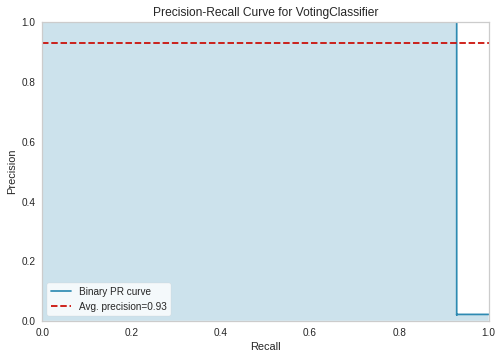

In [ ]:
plot_model(blended_model, plot = "pr")

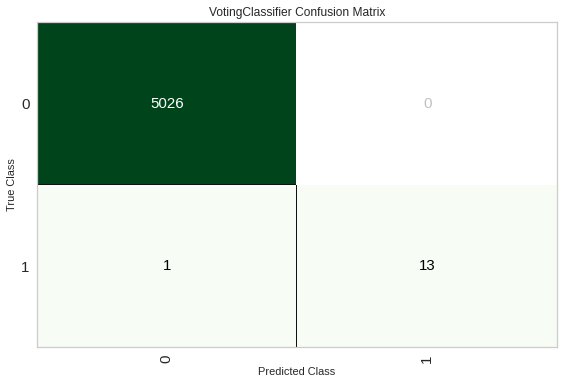

In [ ]:
plot_model(blended_model, plot = "confusion_matrix")

In [ ]:
unseen_predictions = predict_model(blended_model, data=test_dataset)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,29475,0.832201,-1.173372,0.581066,0.583068,-1.205124,0.206725,-0.506448,0.041786,-0.786468,0.743364,0.567184,0.886230,0.818722,-0.140622,-0.394465,-1.151243,-0.457851,2.007508,-0.776008,-0.018943,-0.067533,-0.082960,-0.314948,0.015966,0.473036,-0.245836,0.033716,0.061943,239.00,0,0,0.9404
1,4645,1.044682,-0.022568,0.378691,0.431092,0.500305,1.580945,-0.562183,0.558808,1.279603,-0.421295,2.863531,-1.905157,0.498113,2.242263,0.857755,-0.635464,1.220341,-1.442371,-1.452292,-0.325887,-0.270342,-0.498064,0.234466,-1.435036,-0.154380,0.190778,0.001311,-0.017415,7.68,0,0,0.9273
2,29388,1.165972,-0.144833,-0.097223,1.736661,1.698404,4.646759,-1.189485,1.205305,0.333703,0.445184,-1.139136,0.131542,-0.212733,-0.574200,-1.294293,0.358418,-0.493509,0.140427,-0.193818,-0.064066,-0.032082,0.113416,-0.165203,1.045671,0.774785,0.228583,0.050559,0.020283,1.52,0,0,0.8966
3,32530,-1.001045,0.171743,1.463815,-1.436143,0.607010,-0.535604,0.939918,-0.482368,0.750168,0.739170,1.507751,-0.363870,-1.786733,-0.218540,0.277971,0.214218,-0.870050,-0.321602,-0.724573,-0.054063,-0.253659,0.048905,0.185585,0.024441,-0.327144,0.701168,-0.339876,-0.616136,1.31,0,0,0.9447
4,33876,1.170253,0.110453,0.378512,1.404609,-0.277095,-0.216854,-0.037768,0.070685,0.517610,-0.079213,-0.791415,-0.265470,-1.626447,0.362464,0.069611,-0.653474,0.348911,-0.795515,-0.356530,-0.292940,-0.121063,-0.177011,-0.041015,0.053768,0.613896,-0.307438,0.030749,0.012238,4.99,0,0,0.9333


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Class, unseen_predictions.Label, "Accuracy")

0.9989

In [ ]:
check_metric(unseen_predictions.Class, unseen_predictions.Label, "Recall")

0.7

In [ ]:
check_metric(unseen_predictions.Class, unseen_predictions.Label, "F1")

0.8235

In [ ]:
check_metric(unseen_predictions.Class, unseen_predictions.Label, "Precision")

1.0

In [46]:
save_model(blended_model, "Assignment3_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                                       max_features=3,
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
     